In [124]:
import pandas as pd #importing the Pandas Library as 'pd'
from keplergl import KeplerGl #importing KeplerGl
import geopandas as gpd #importing geopandas as 'gpd'
from shapely.geometry import Point

from geopy.geocoders import Nominatim # Imports the geopy for the geocoding

In [156]:

map = KeplerGl(height=600, width=800)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [159]:
filename = "Liverpool.geojson"
file = open(filename)
df = gpd.read_file(file)

In [160]:
df

,LSOA11CD,LSOA11NM,LSOA code (2011),LSOA name (2011)_x,Local Authority District code (2019)_x,Local Authority District name (2019)_x,Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),...,Road traffic accidents indicator,Nitrogen dioxide (component of air quality indicator),Benzene (component of air quality indicator),Sulphur dioxide (component of air quality indicator),Particulates (component of air quality indicator),Air quality indicator,lsoa11,mean_price,median_price,geometry
0,Liverpool 050G,Liverpool 050G,E01032506,Liverpool 050G,Liverpool 050G,E08000012,326,208,0,0,...,0.0,0.0,0.12,0.49,0.0,1.04,875,0.410,0.699,"POLYGON ((-2.95426 53.38099, -2.95408 53.38093..."
1,Liverpool 050H,Liverpool 050H,E01032507,Liverpool 050H,Liverpool 050H,E08000012,233,183,0,0,...,0.0,0.0,0.12,0.49,0.0,1.04,1047,0.365,1.001,"POLYGON ((-2.95186 53.38009, -2.95182 53.38007..."
2,Liverpool 050F,Liverpool 050F,E01032505,Liverpool 050F,Liverpool 050F,E08000012,295,233,0,0,...,0.0,0.0,0.12,0.49,0.0,1.04,758,0.488,1.765,"POLYGON ((-2.96348 53.37651, -2.96314 53.37672..."
3,Liverpool 027G,Liverpool 027G,E01032508,Liverpool 027G,Liverpool 027G,E08000012,335,344,0,0,...,0.0,0.0,0.20,0.59,0.0,1.31,1130,0.723,0.425,"POLYGON ((-2.91993 53.41418, -2.91991 53.41425..."
4,Liverpool 027H,Liverpool 027H,E01032509,Liverpool 027H,Liverpool 027H,E08000012,238,255,0,0,...,0.0,0.0,0.15,0.57,0.0,1.18,849,0.603,0.704,"POLYGON ((-2.92471 53.41143, -2.92470 53.41143..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,Liverpool 012A,Liverpool 012A,E01006611,Liverpool 012A,Liverpool 012A,E08000012,214,230,0,0,...,0.0,0.0,0.22,0.61,0.0,1.40,827,0.729,0.924,"POLYGON ((-2.97110 53.43924, -2.97103 53.43949..."
294,Liverpool 014A,Liverpool 014A,E01006699,Liverpool 014A,Liverpool 014A,E08000012,315,322,0,0,...,0.0,0.0,0.22,0.61,0.0,1.40,1050,0.713,0.435,"POLYGON ((-2.97750 53.43998, -2.97755 53.43996..."
295,Liverpool 016C,Liverpool 016C,E01006618,Liverpool 016C,Liverpool 016C,E08000012,441,233,0,0,...,0.0,0.0,0.18,0.55,0.0,1.22,887,0.510,0.878,"POLYGON ((-2.92479 53.43070, -2.92477 53.43072..."
296,Liverpool 012D,Liverpool 012D,E01006698,Liverpool 012D,Liverpool 012D,E08000012,290,398,0,0,...,0.0,0.0,0.22,0.61,0.0,1.40,1042,0.575,0.811,"POLYGON ((-2.97537 53.44391, -2.97537 53.44391..."


In [161]:
map.add_data(data=df, name="Liverpool_lsoa")



In [84]:
! pip3 install geopy

In [65]:
# Notes on terms
# Select a type polygon
# Select geo as geometry
# Strokes refer to the width of the line
# Fill color changes the color of the polygons
# Edit the 'new layer' to change the names of the
# Press the eye icon in the exported widget to bring the layer to the top


# Adding in the foodbank information

In [43]:
# Initialises the geocoding
geolocator = Nominatim(user_agent="Liverpool_analysis")


(40.741059199999995, -73.98964162240998)


In [136]:
foodbanks=pd.read_csv("Liverpool_foodbanks_geocode_input.csv")

In [137]:
foodbanks.head(n=3)

,Category,Company Name,Region,name,Street Address,City,State,Zip,Mobile Number,Website Address,Email,Reviews Average,Count Of Review
0,Charity,The Trussell Trust Food Bank,Liverpool,60 Peel Rd Bootle L20 4RW,60 Peel RdBootle L20 4RW,60 Peel Rd,BootleL20,4.0,0151 933 1300,trusselltrust.org,reg_with_fund_reg@2x.png,5.0,5.0
1,Foodbank,Christ Church Community Centre,Liverpool,8 Oxford Rd Bootle L20 9HW,8 Oxford RdBootle L20 9HW,8 Oxford Rd,BootleL20,9.0,NaN,NaN,NaN,NaN,NaN
2,Church,St Oswalds Church Centre,Liverpool,Ronald Ross Ave Netherton Bootle L30 5RD,Ronald Ross AveNetherton,Liverpool,BootleL30,5.0,0151 521 6002,NaN,NaN,3.0,3.0


In [138]:
# Adjust the coding of the address to make the geocoding more accurate

def complete_address(x):
  if "Bootle" in x:
    return x+", Bootle, UK"
  if "Waterloo" in x:
    return x+", Waterloo, UK"
  if "Speke" in x:
    return x+", Speke, UK"
  else:
    return x+", Liverpool, UK"


foodbanks["full_address"]=foodbanks["name"].apply(complete_address)

In [139]:
# The geocoding function

def long_lat_func(x):
  try:
    location = geolocator.geocode(str(x))
    # Parse the tuple
    return location.latitude , location.longitude
  except:
    return None, None

In [140]:
# Applies the geocoding function

foodbanks["lat"] , foodbanks["lon"] = zip(*foodbanks["full_address"].apply(long_lat_func))

In [164]:
# Subsets to drop the na terms
foodbanks=foodbanks.dropna(subset=['lon', 'lat'])

#Converts the longitude and latitude as points data to give the geocoordinates for the data frame
geometry = [Point(xy) for xy in zip(foodbanks['lon'], foodbanks['lat'])]



# Create a GeoDataFrame from art and verify the type
foodbanks_geo = gpd.GeoDataFrame(foodbanks, crs = 'epsg:4326' , geometry = geometry)

<AxesSubplot:>

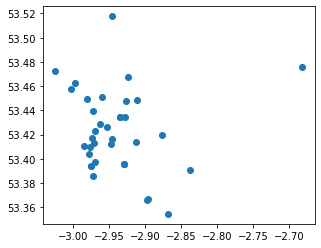

In [165]:
foodbanks_geo.plot()

In [166]:
map.add_data(data=foodbanks_geo, name="foodbanks")

# The map

In [169]:
map

KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'ioua3tkh', 'type':…

In [170]:
# Saves the map to an html format that can be rendered in the browser
map.save_to_html(file_name='Liverpool_14_12_20.html')

Map saved to Liverpool_14_12_20.html!


In [ ]:
The map can also be served as a flask app

from flask import Flask

app = Flask(__name__)

@app.route('/')
def index():
    return map_1._repr_html_()

if __name__ == '__main__':
    app.run(debug=True)